In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pyproj import Proj
import shapefile
import pandas as pd
import utm

## Catchment And Stations

In [3]:

shpFilePath = 'Narayani_catchment/watershed.shp'  
listx=[]
listy=[]
shp_file = shapefile.Reader(shpFilePath)
for sr in shp_file.shapeRecords():
    for xNew,yNew in sr.shape.points:
        listx.append(xNew) # longitude
        listy.append(yNew) # latitude

In [4]:
DATA = pd.read_table('station_loc.txt')
display(DATA)

,S.N,Station_id,Station_name,Latitude,Longitude,Altitude_m
0,1,607,Lete,28.38,83.36,2384
1,2,804,Pohara,28.13,84.00,827
2,3,814,Lumle,28.18,83.48,1740
3,4,902,Rampur,27.37,84.25,256
4,5,1055,Dhunche,28.06,85.18,1982


**Making shapefile from Metric units to Longi and Latidude with proj:** 

In [5]:
myProj = Proj("+proj=utm +zone=45K, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
long, lati = myProj(listx, listy, inverse=True)


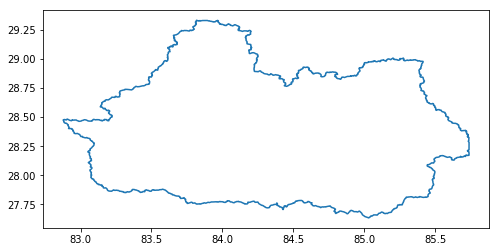

In [6]:
plt.figure(figsize=(8,4))
plt.plot(long,lati)
plt.show()

** Placement of Stations with ID in catchment:**

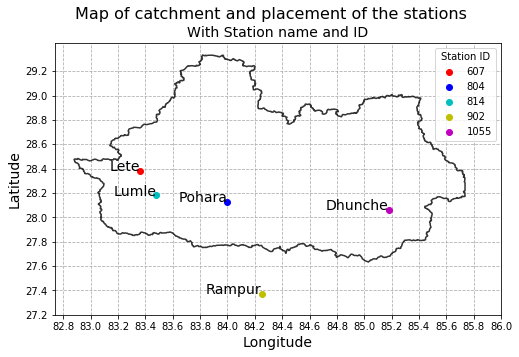

In [10]:
Sta_name=DATA['Station_name']
Sta_id=DATA['Station_id']
Sta_alt=DATA['Altitude_m'] 
lon=DATA['Longitude']
lat=DATA['Latitude']
C=(['ro','bo','co','yo','mo'])
plt.figure(figsize=(8,5))
plt.plot(long,lati,'k',alpha=0.8)

for i in range(5):
    plt.plot(lon[i],lat[i],C[i],label=Sta_id[i])
    plt.annotate(Sta_name[i], (lon[i], lat[i]),size=14,horizontalalignment='right')

plt.legend(title='Station ID')
plt.suptitle('Map of catchment and placement of the stations',size=16)
plt.title('With Station name and ID',size=14)
plt.xlabel('Longitude',size=14)
plt.ylabel('Latitude',size=14)
plt.xticks(np.arange(82.8, 86, step=0.2))
plt.yticks(np.arange(27.2, 29.4, step=0.2))    
plt.grid(True,linestyle='--')
plt.show()
    

** Placement of Stations with Altitude in catchment:**

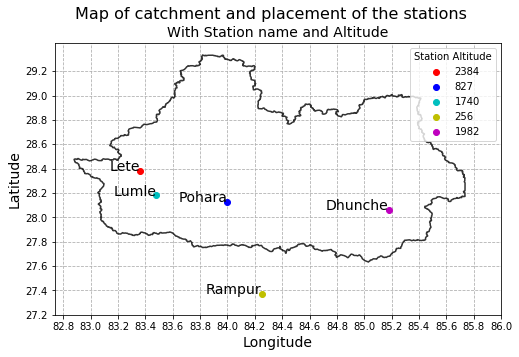

In [12]:
Sta_name=DATA['Station_name']
Sta_id=DATA['Station_id']
Sta_alt=DATA['Altitude_m'] 
C=(['ro','bo','co','yo','mo'])
plt.figure(figsize=(8,5))
plt.plot(long,lati,'k',alpha=0.8)
for i in range(5):
    plt.plot(lon[i],lat[i],C[i],label=Sta_alt[i])
    plt.annotate(Sta_name[i], (lon[i], lat[i]),size=14,horizontalalignment='right')

plt.legend(title='Station Altitude',loc='upper right')
plt.suptitle('Map of catchment and placement of the stations',size=16)
plt.title('With Station name and Altitude',size=14)
plt.xlabel('Longitude',size=14)
plt.ylabel('Latitude',size=14)
plt.xticks(np.arange(82.8, 86, step=0.2))
plt.yticks(np.arange(27.2, 29.4, step=0.2))    
plt.grid(True,linestyle='--')
plt.show()
    